In [2]:
# explor low rank structure of PINN
%load_ext autoreload
%autoreload 2

from Engine import *
from matplotlib import pyplot as plt
from PlotHelper import *



In [36]:
exp_name = 'loraseed'

names = ['p1D1_dat', 'p1D2_dat', 'p2D1_dat', 'prob2_dat']
sd = [0, 1, 2]

models = {}

for model_prefix in names:
    for seed in sd:
        name = f'{model_prefix}_s{seed}'        
        models[name],_ = load_model(exp_name, name)
        


Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/adb10704b46a40d98ec2ccb4e25c9677/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/d15d7d2a486e4472b7f31f629462812c/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/3a6c1392fcd2425c93b48f0c7777f752/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/379edb5d273440578ec2a125c0ee2b52/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/a2392c6502af494986b2438fb5e6d561/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/0178bba494ae49d5b2973367bc9c7270/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/794851306132481054/b5928de998084981b559dce99bbef692/artifacts/net.pth
Using 

save to fig_seed_svd_dat/fig_p1D1_dat_s1_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D1_dat_s2_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D1_dat_s2_vs_p1D1_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s0_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s0_vs_p1D1_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s0_vs_p1D1_dat_s2_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s1_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s1_vs_p1D1_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s1_vs_p1D1_dat_s2_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s1_vs_p1D2_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s2_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s2_vs_p1D1_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p1D2_dat_s2_vs_p1D1_dat

/tmp/ipykernel_1339875/3516533904.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))


save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p1D1_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p1D1_dat_s2_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p1D2_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p1D2_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p1D2_dat_s2_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s1_vs_p2D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s2_vs_p1D1_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s2_vs_p1D1_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s2_vs_p1D1_dat_s2_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s2_vs_p1D2_dat_s0_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s2_vs_p1D2_dat_s1_hidden_layers_0_weight
save to fig_seed_svd_dat/fig_p2D1_dat_s2_vs_p1D2_dat

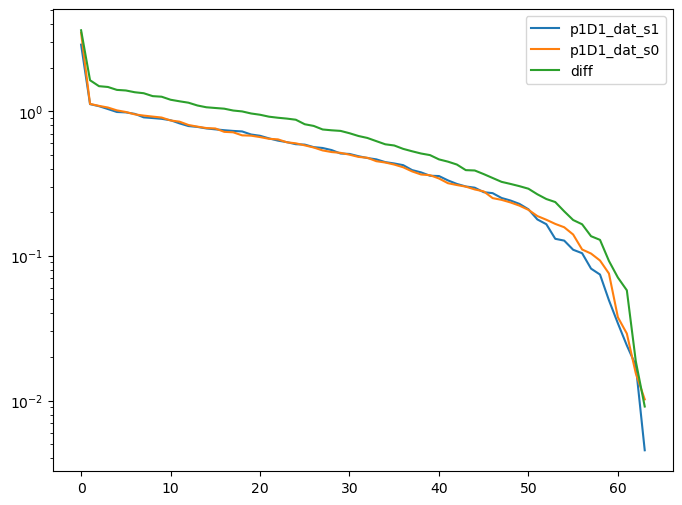

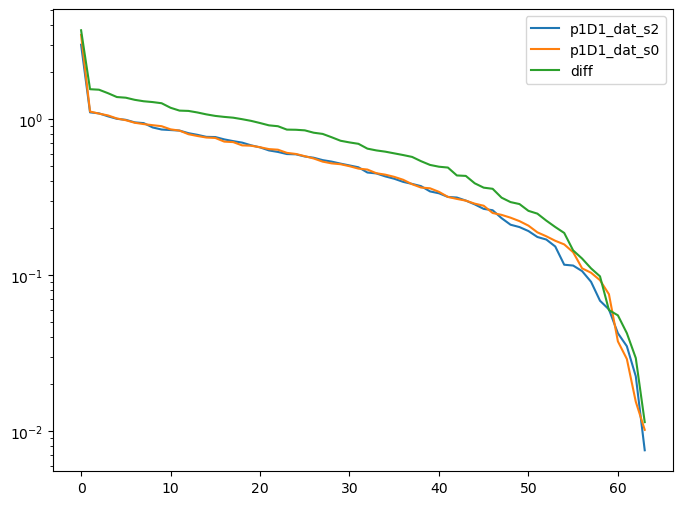

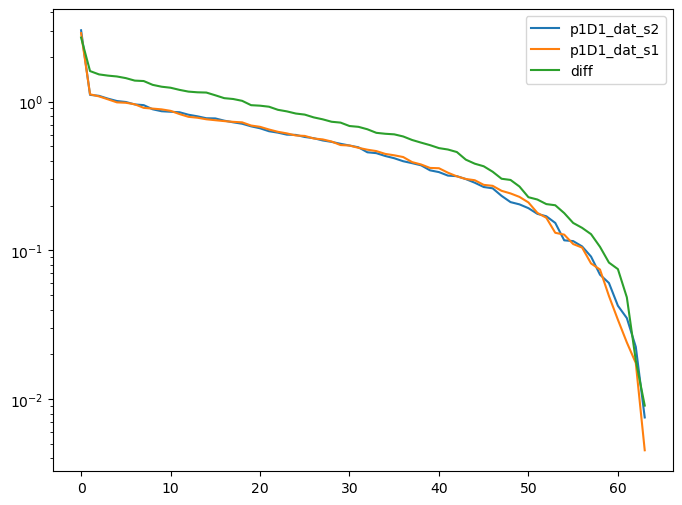

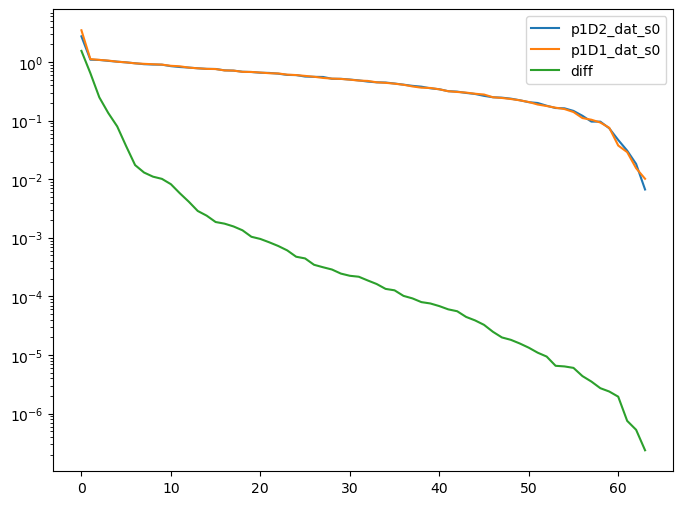

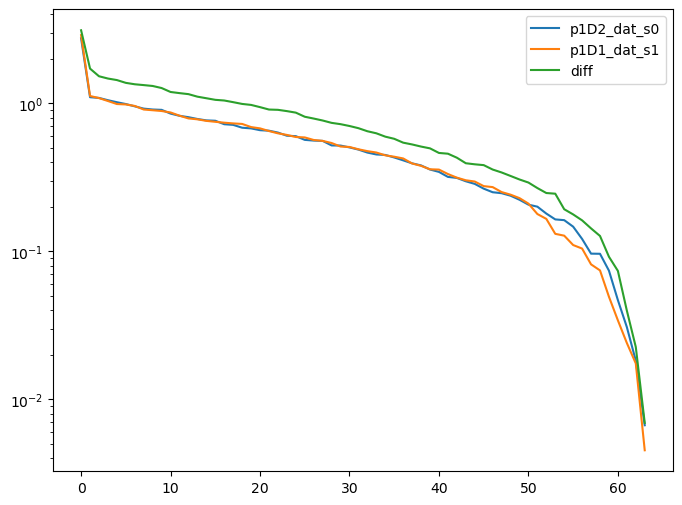

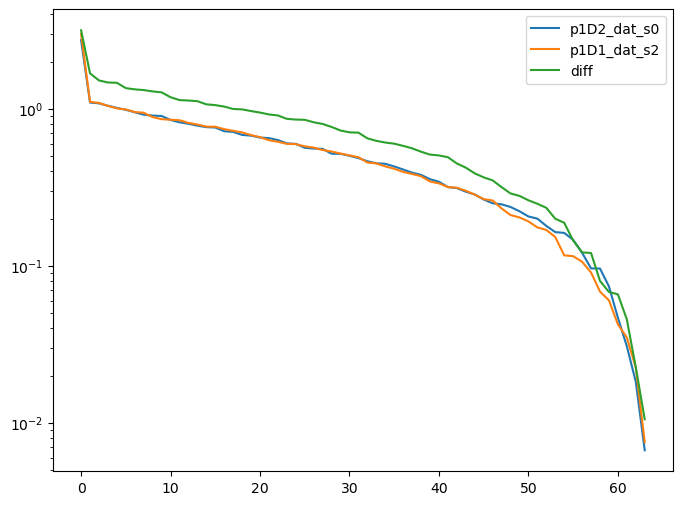

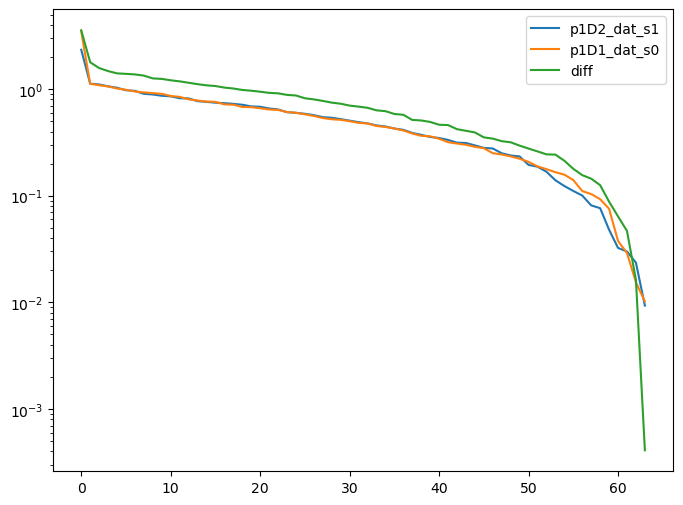

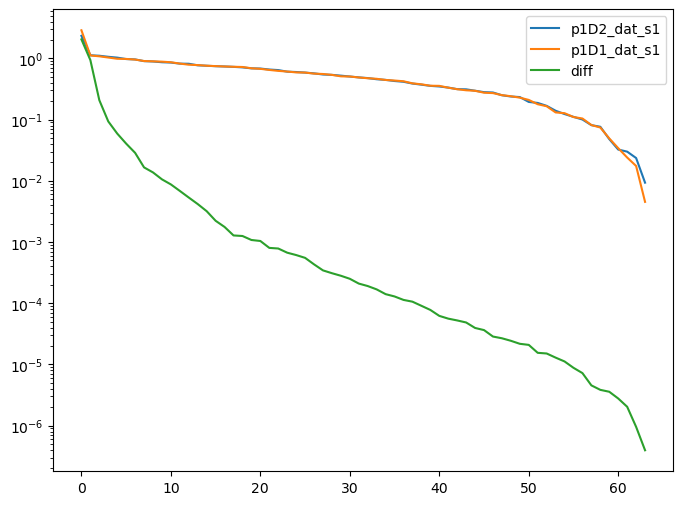

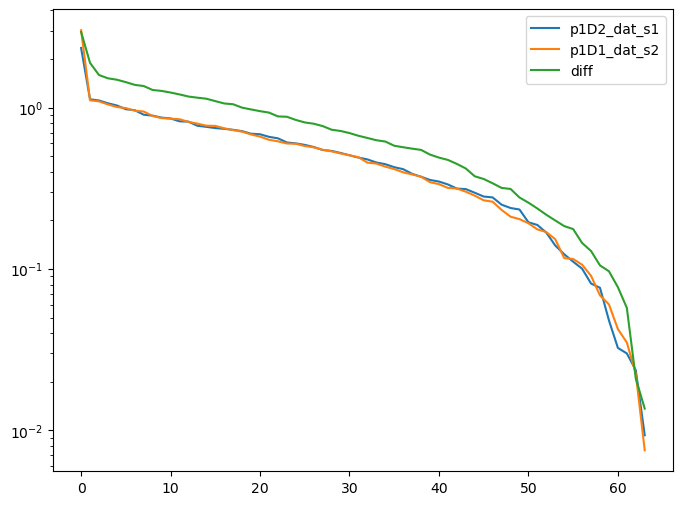

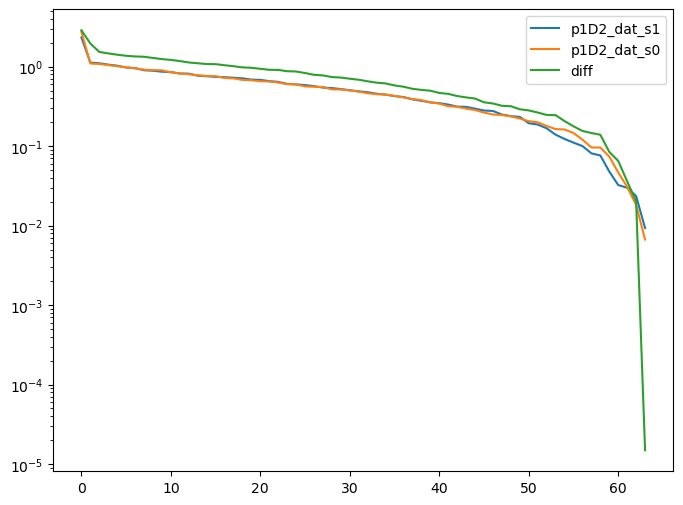

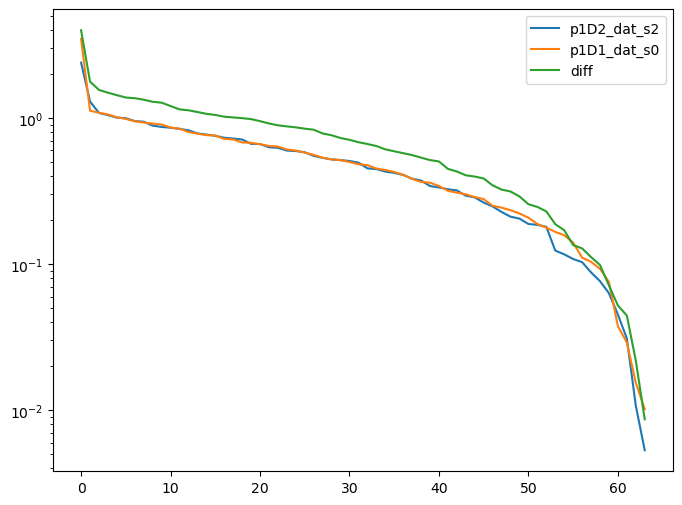

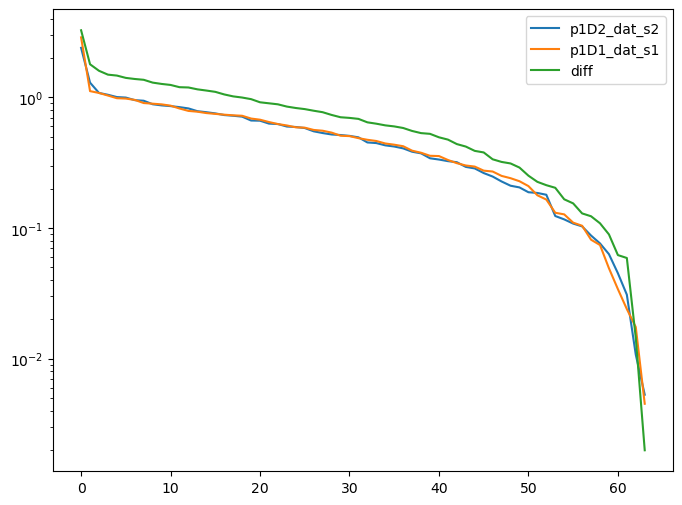

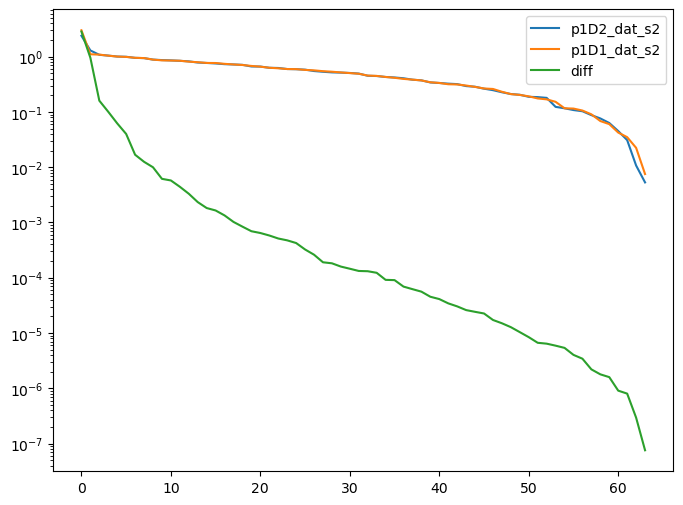

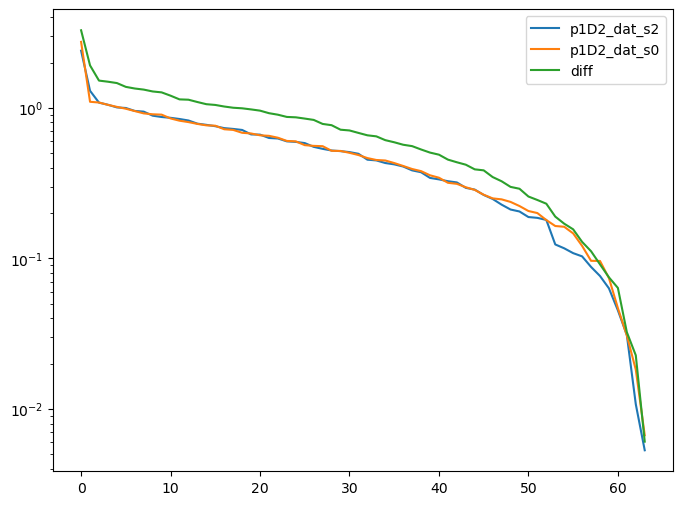

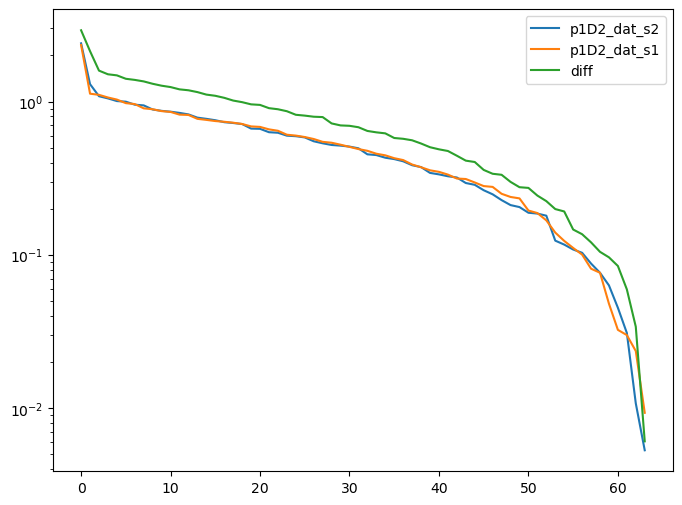

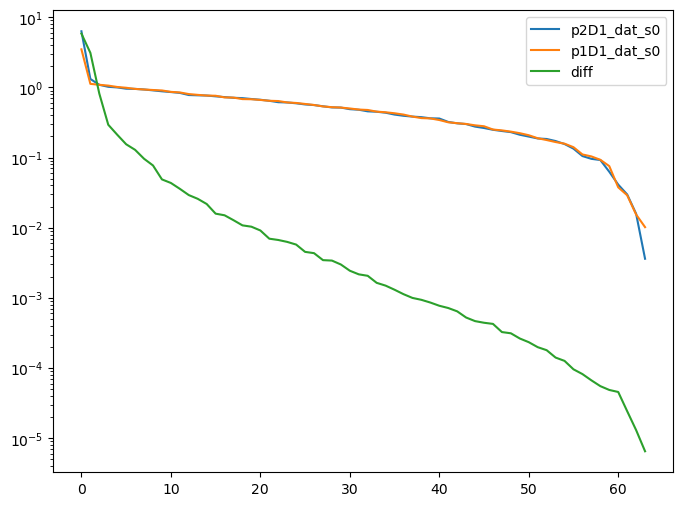

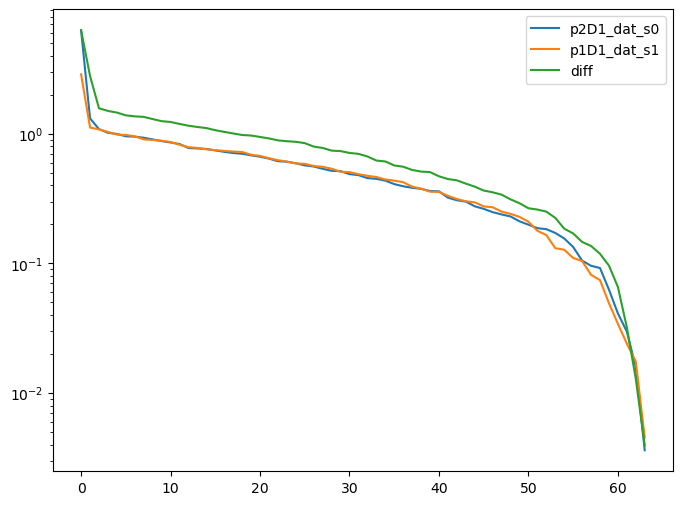

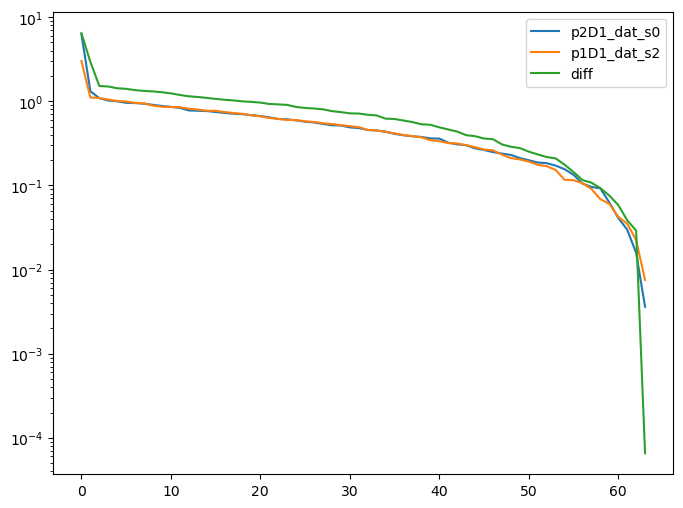

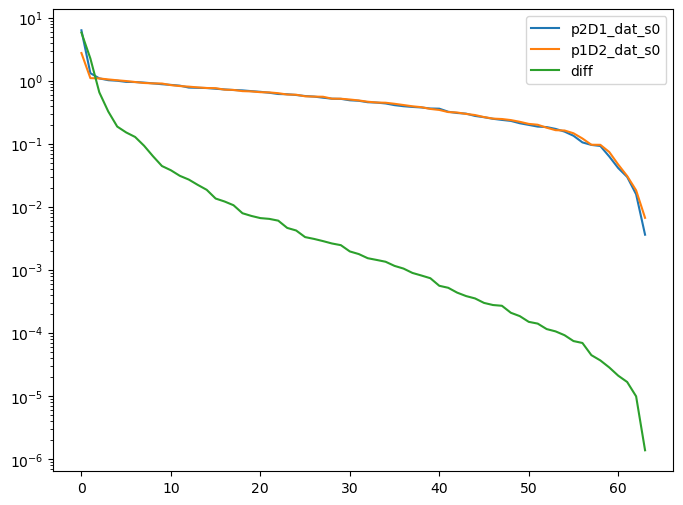

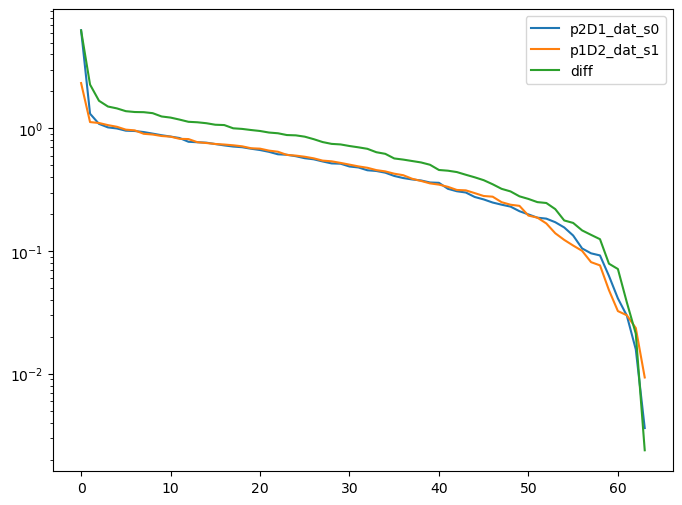

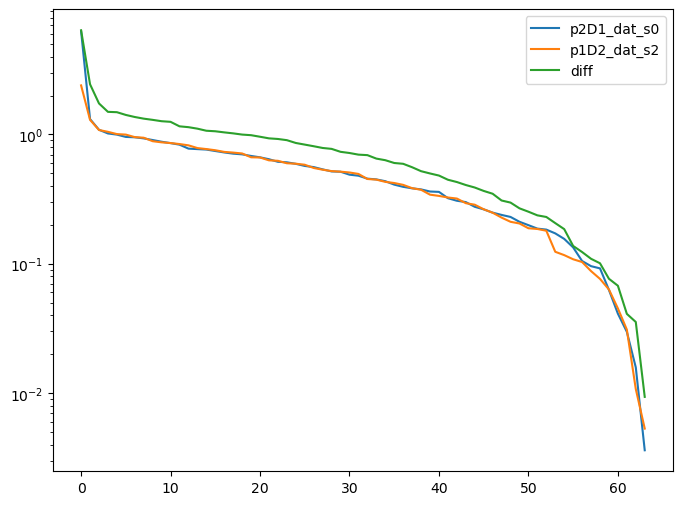

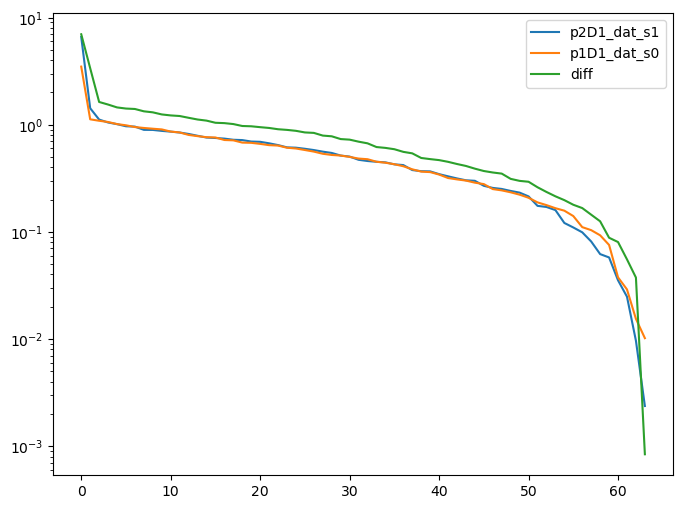

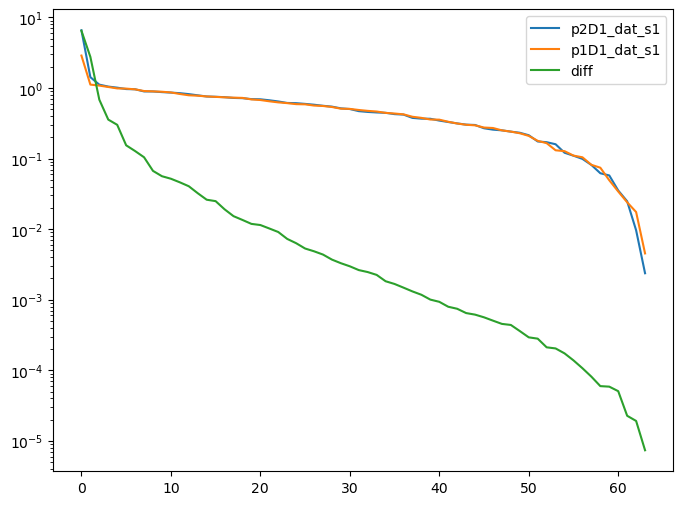

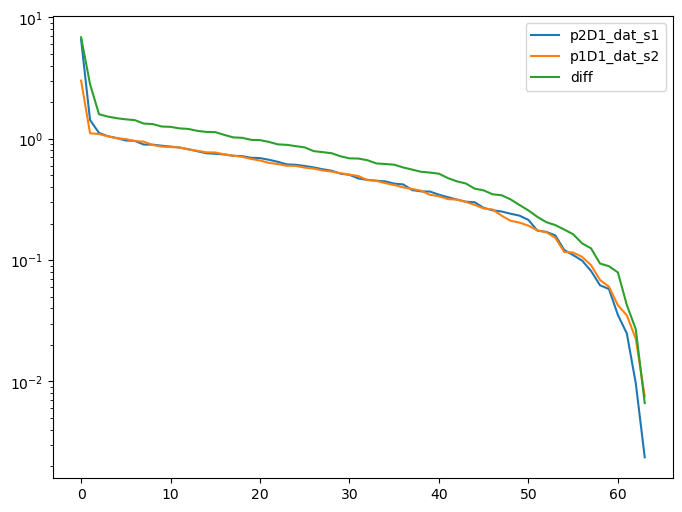

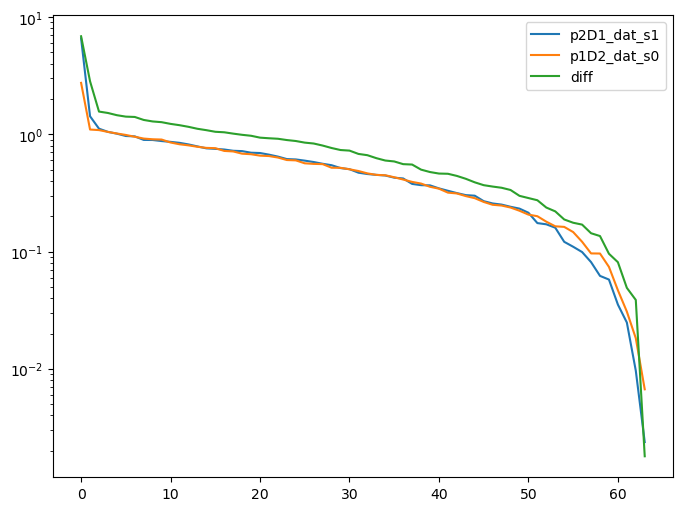

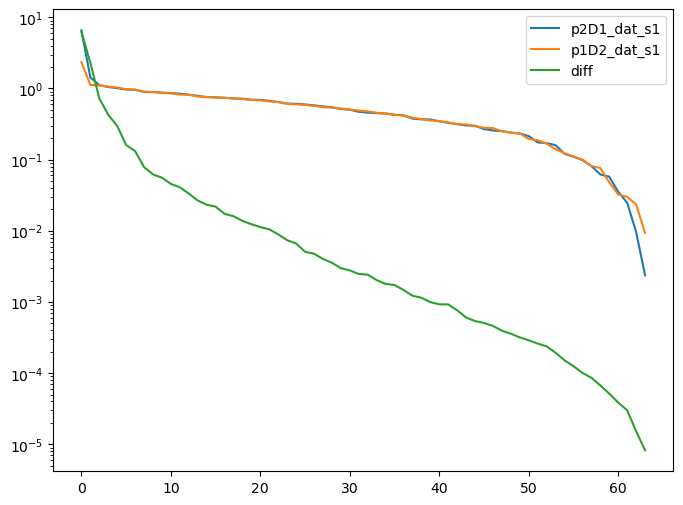

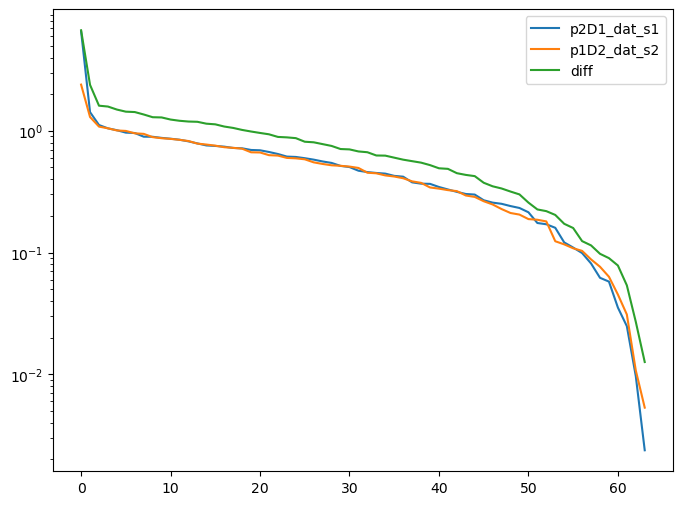

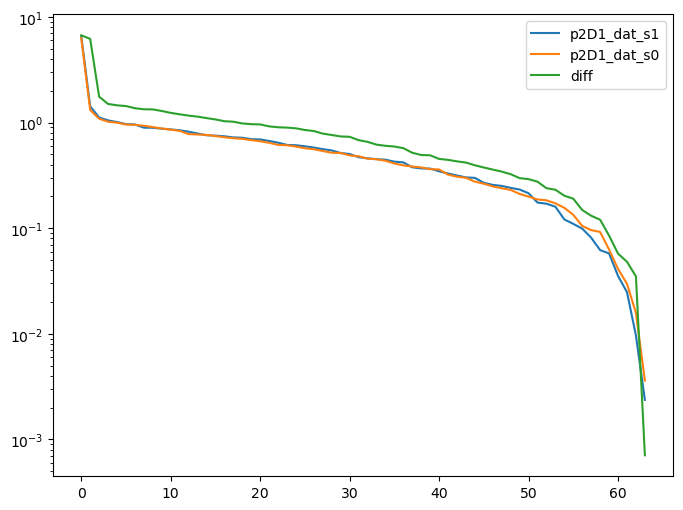

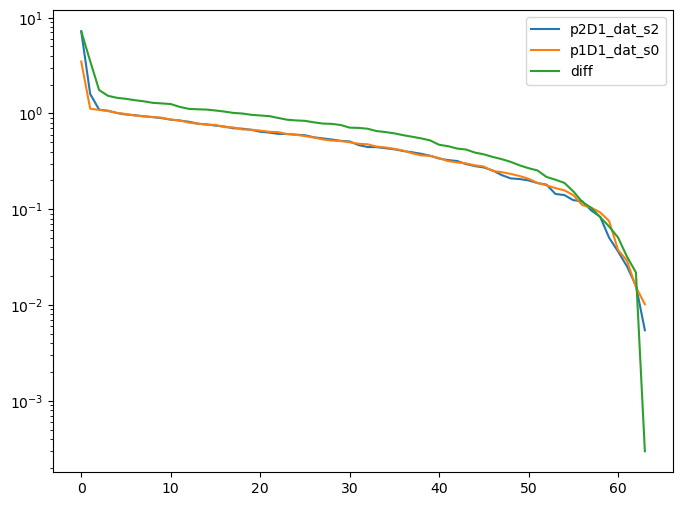

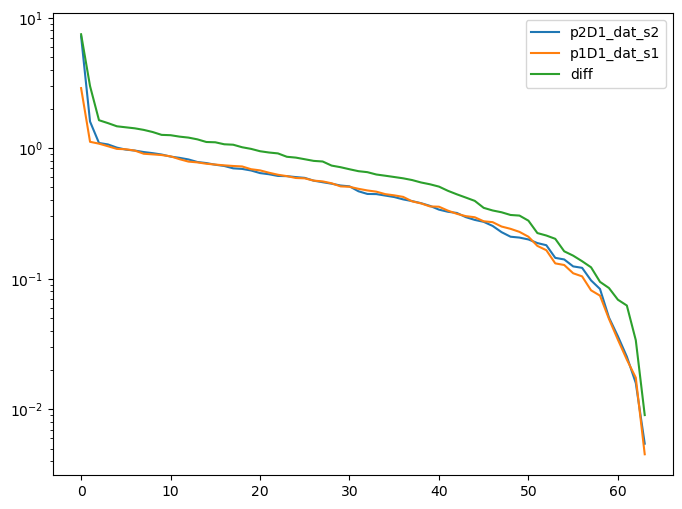

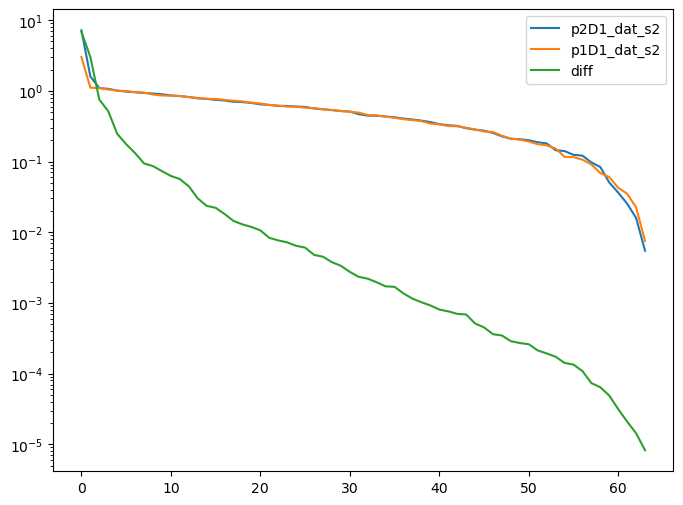

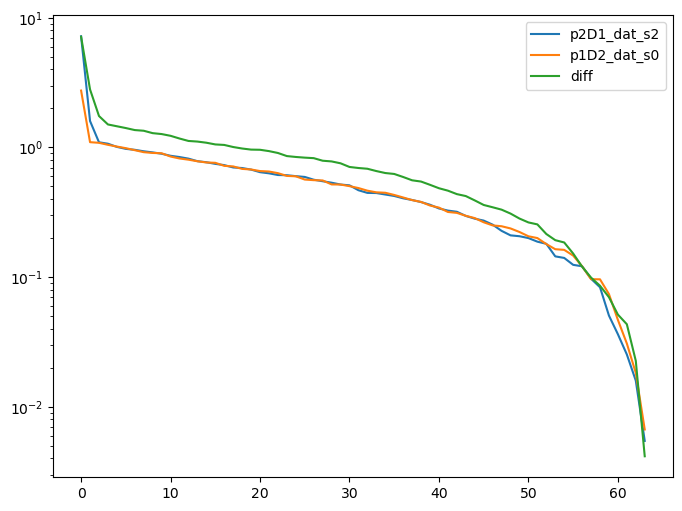

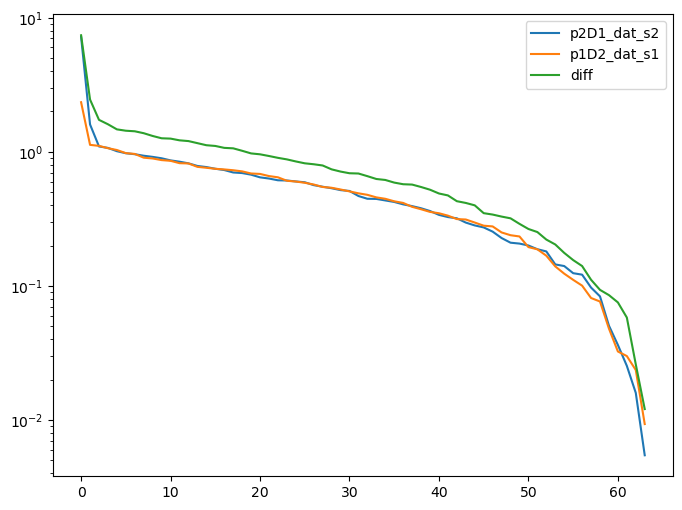

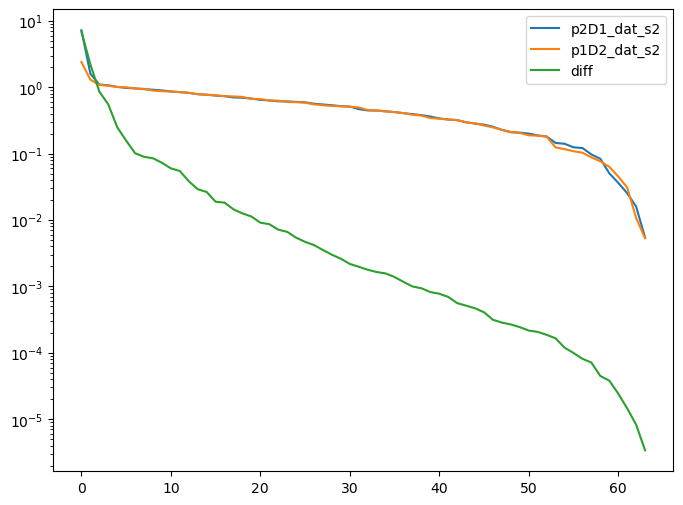

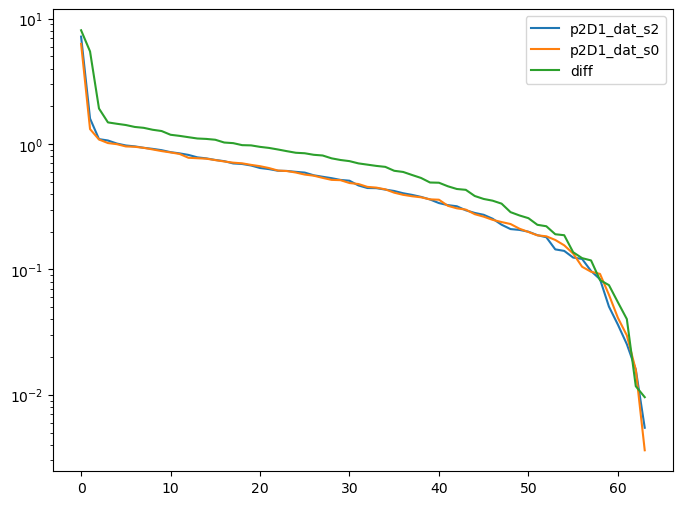

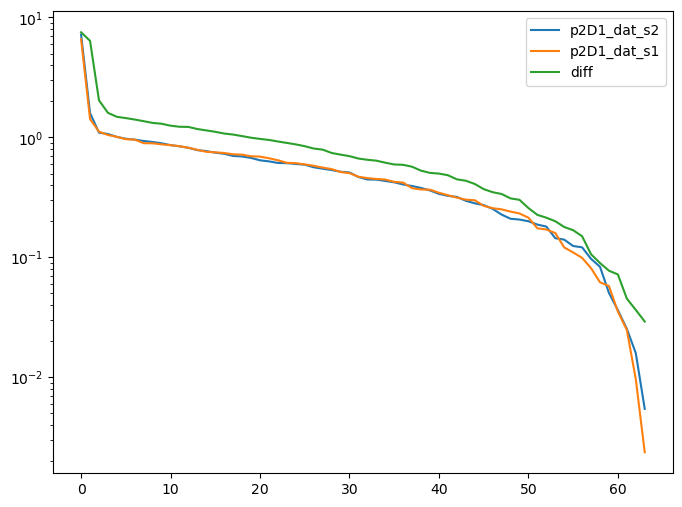

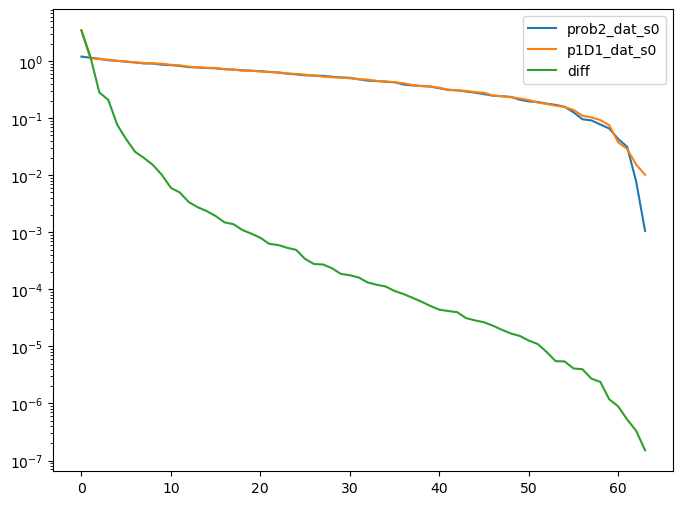

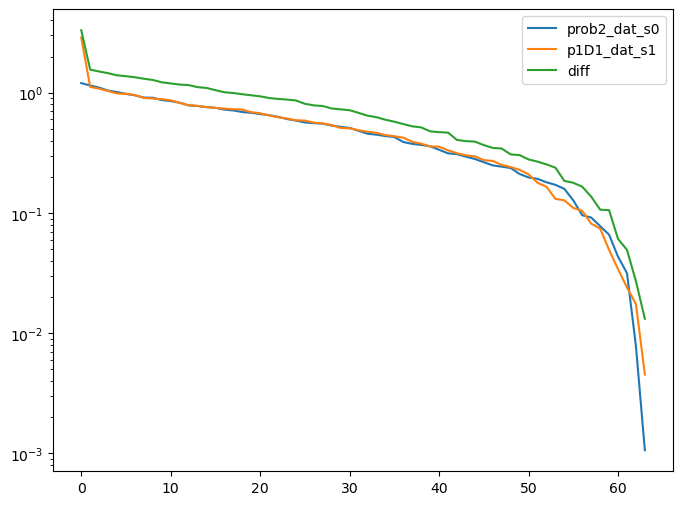

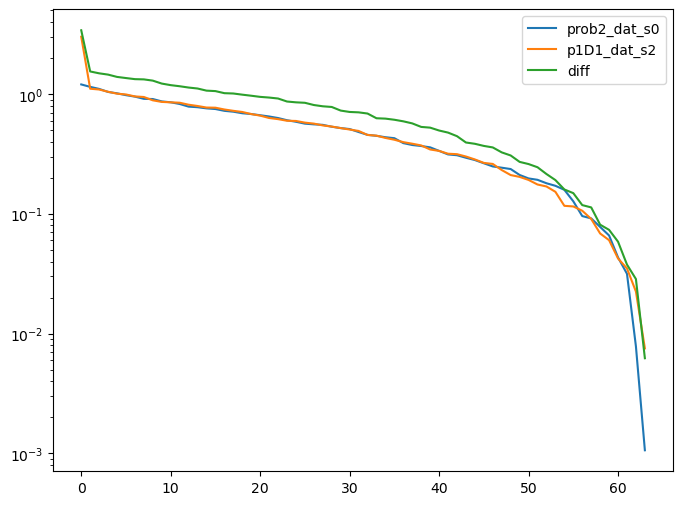

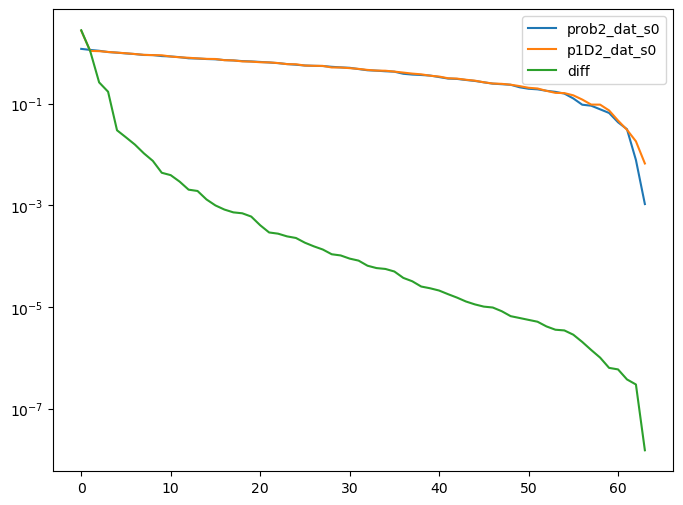

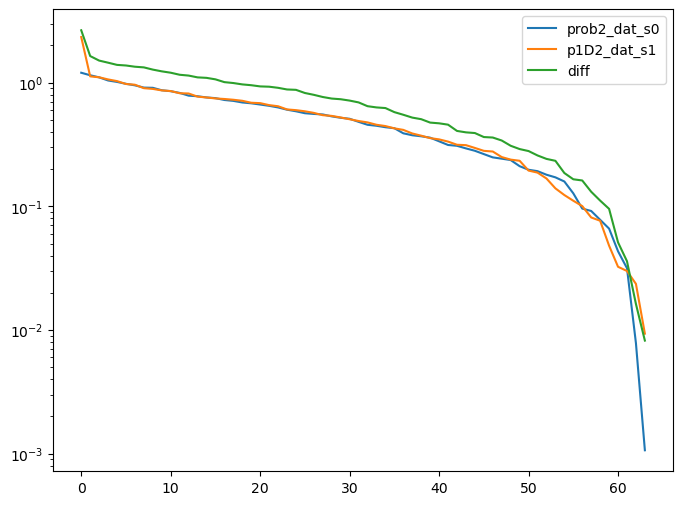

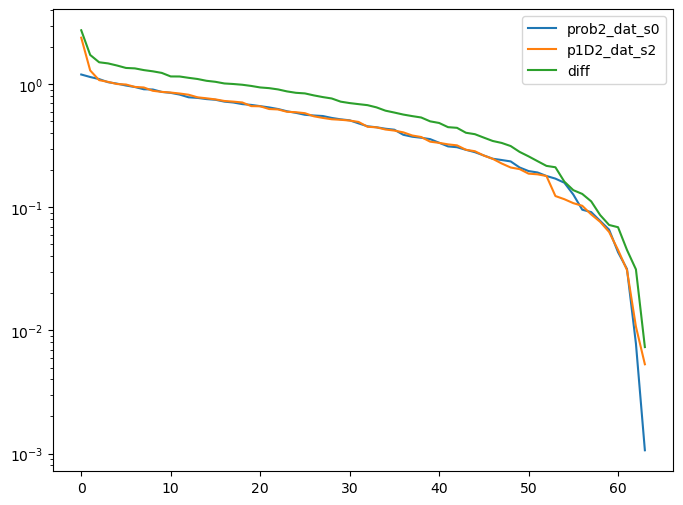

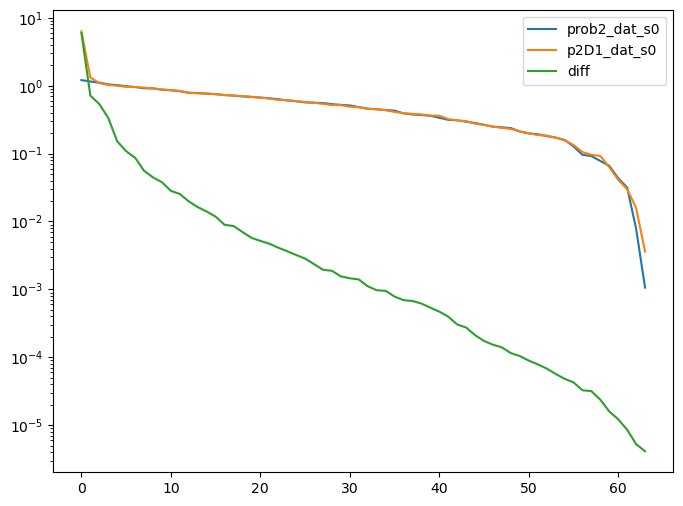

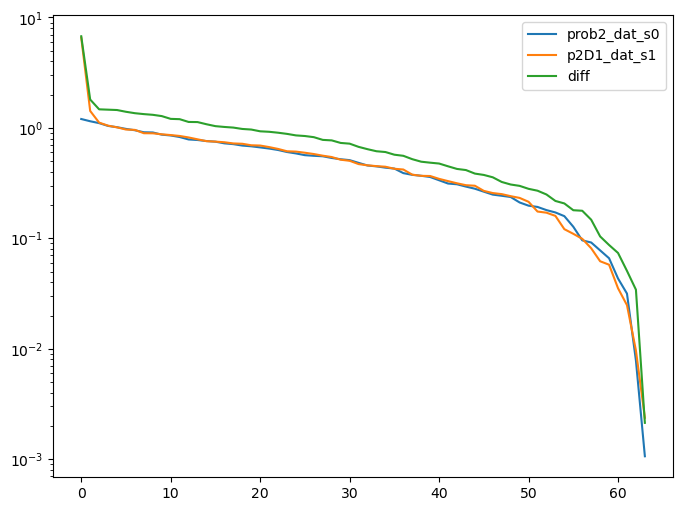

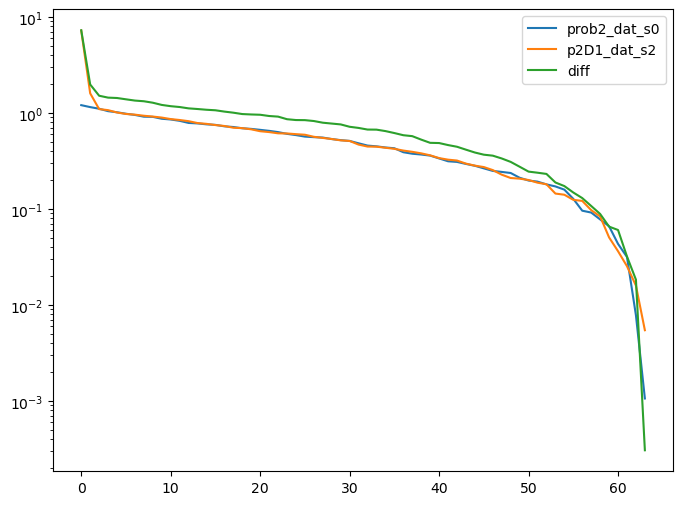

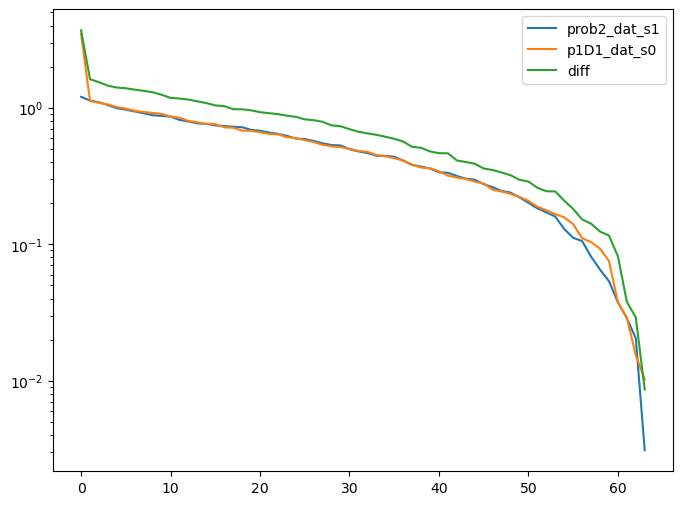

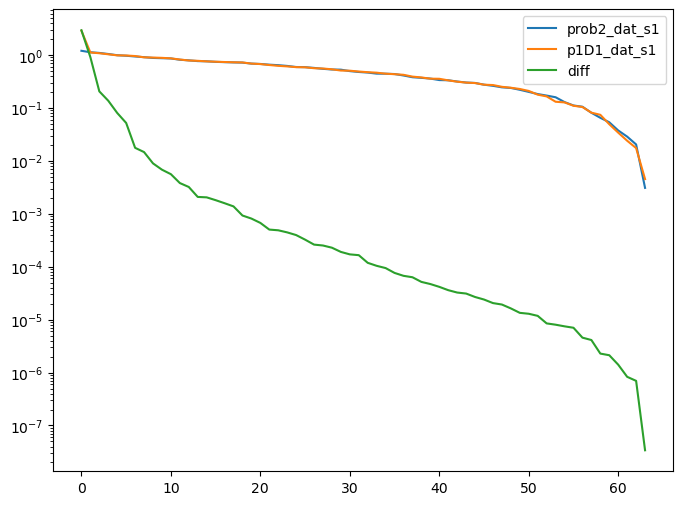

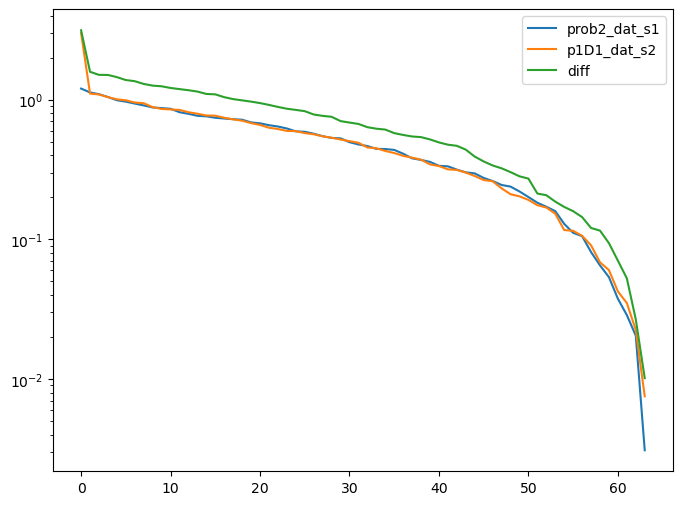

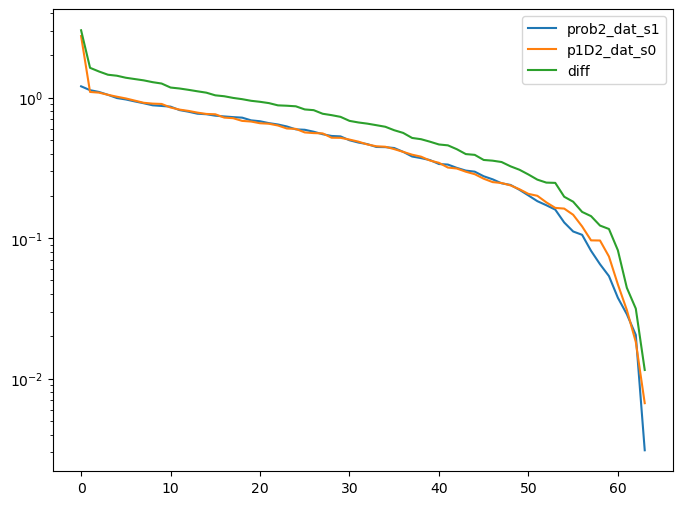

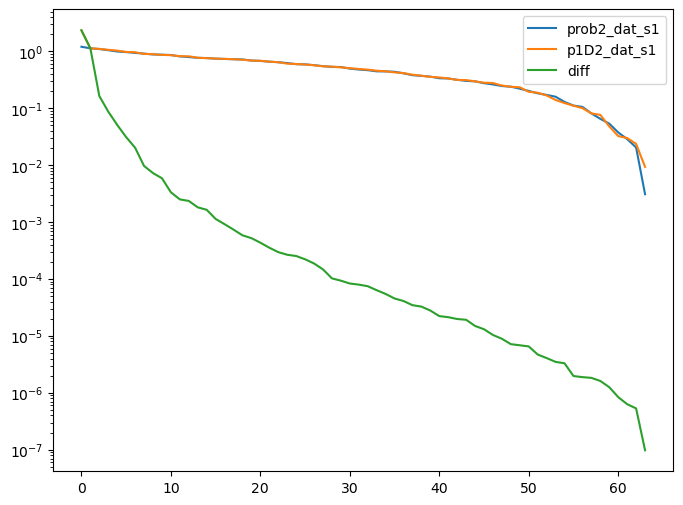

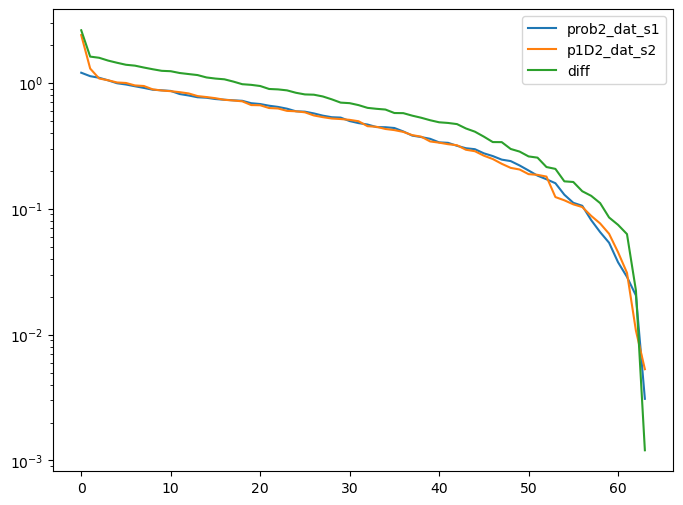

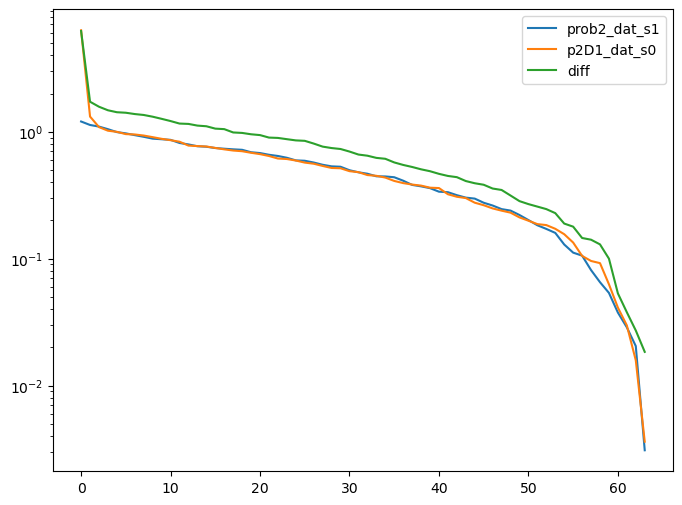

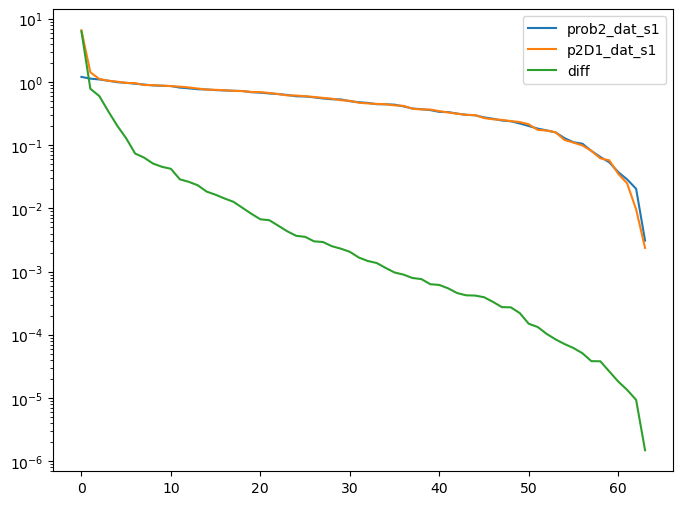

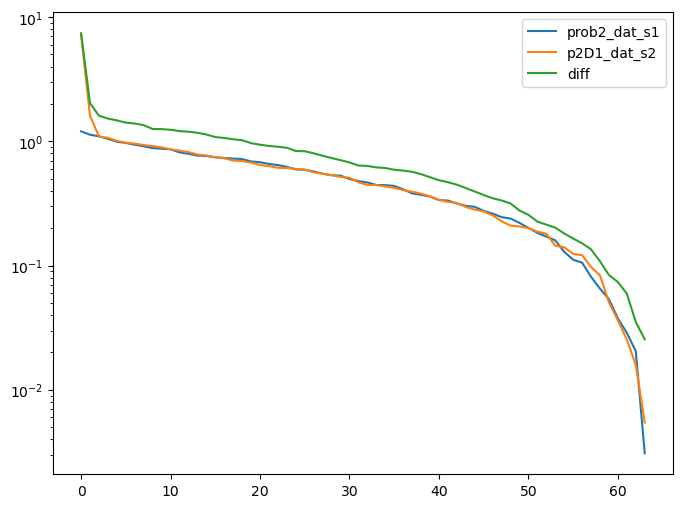

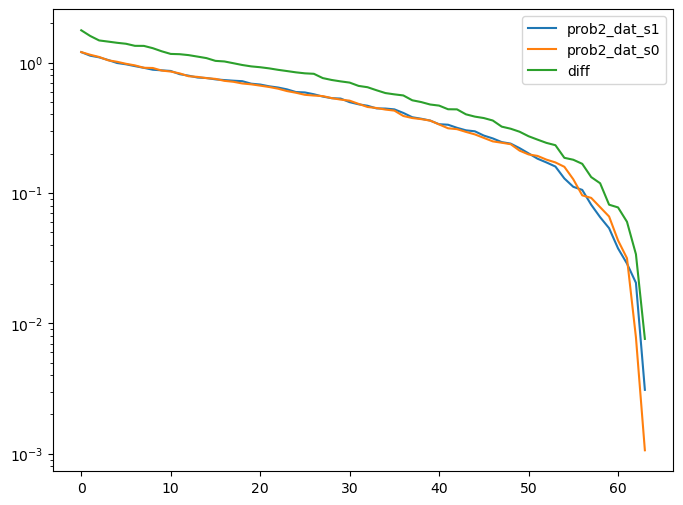

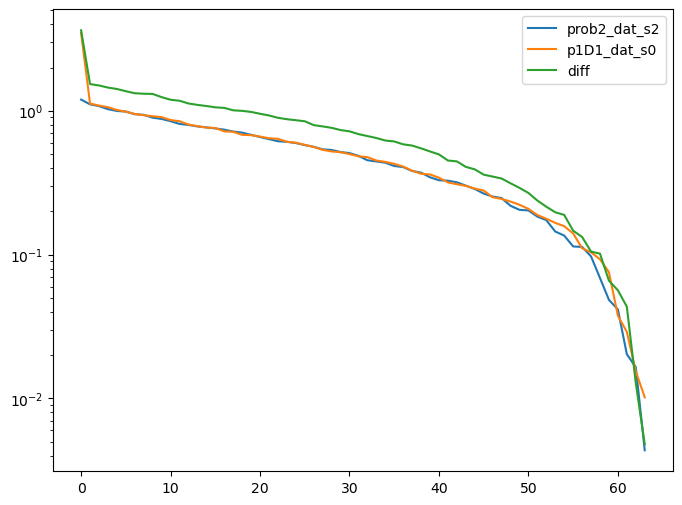

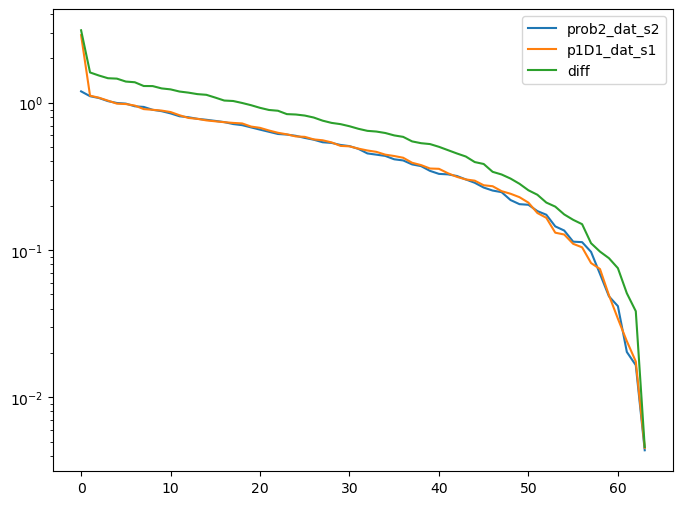

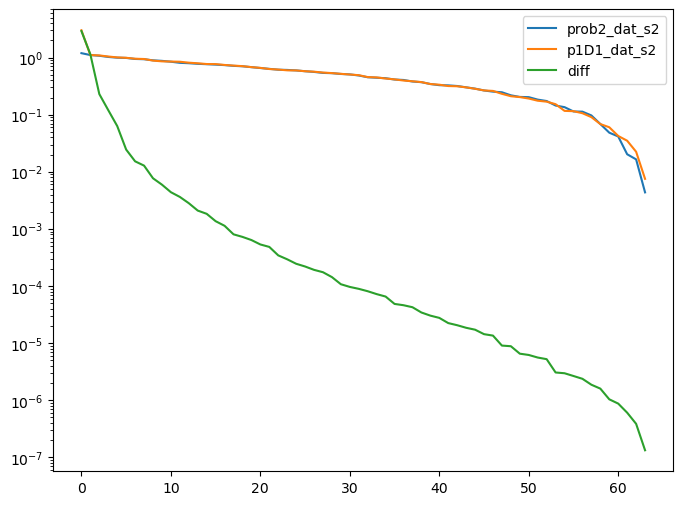

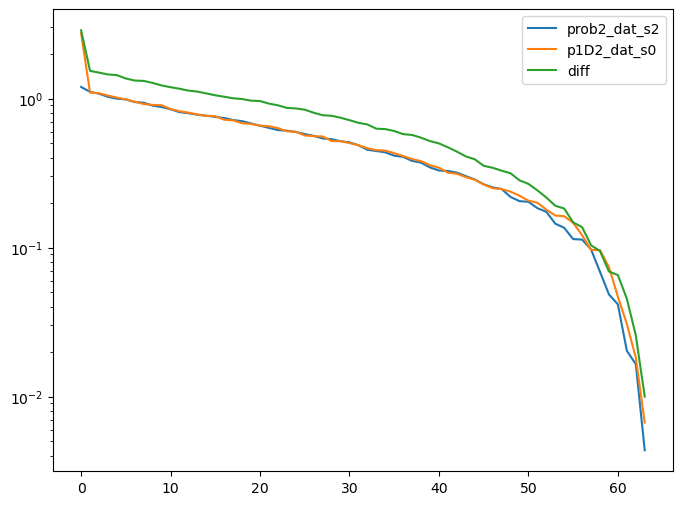

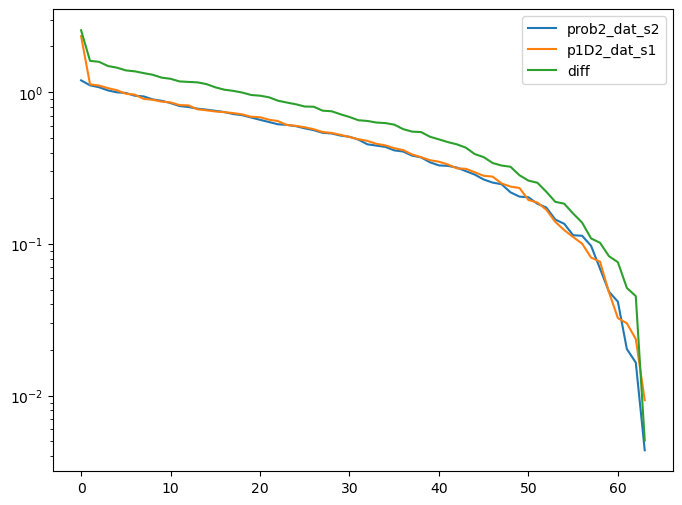

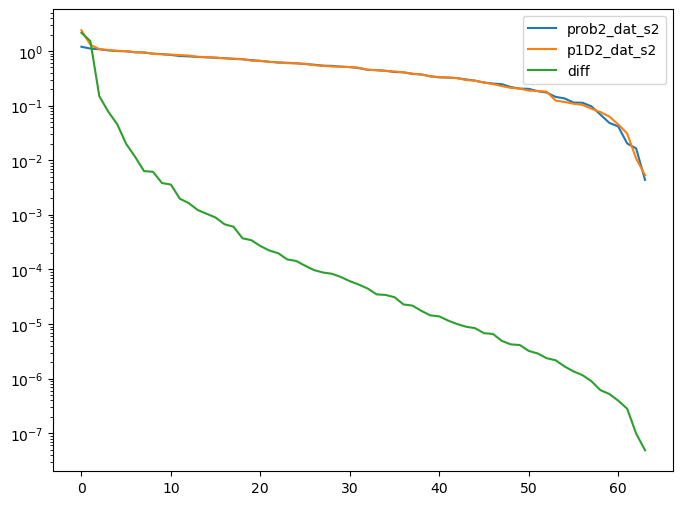

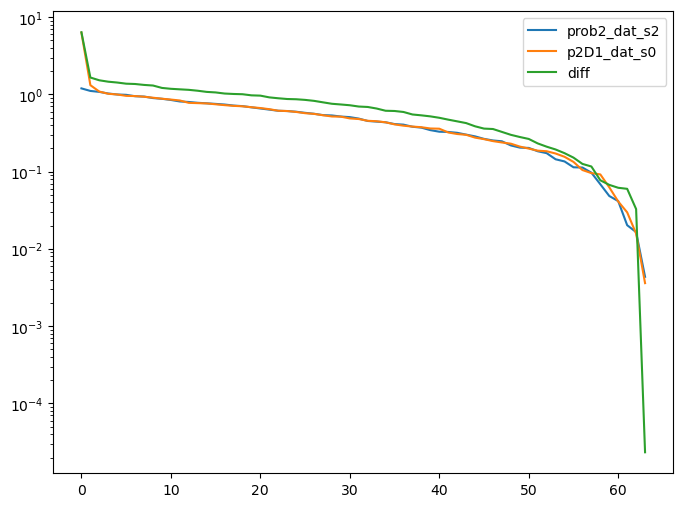

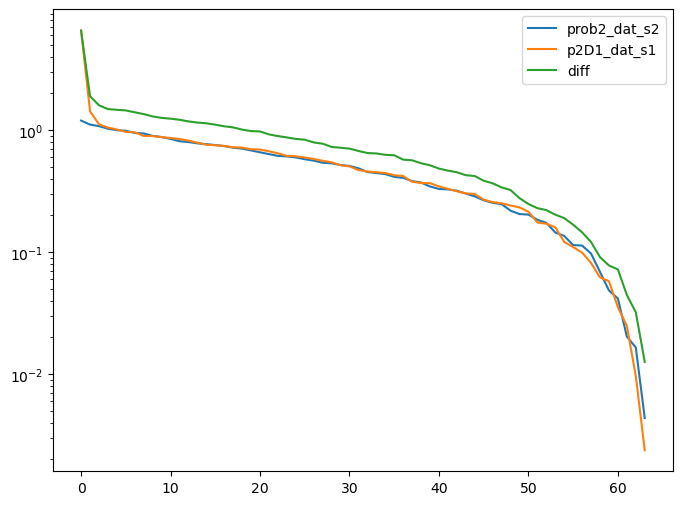

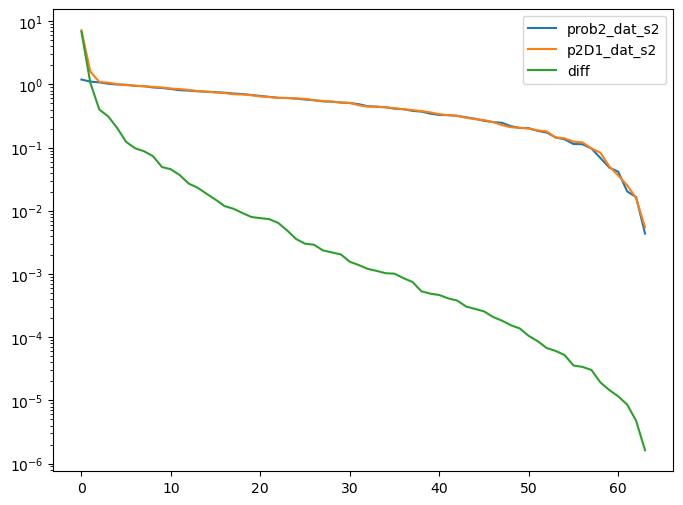

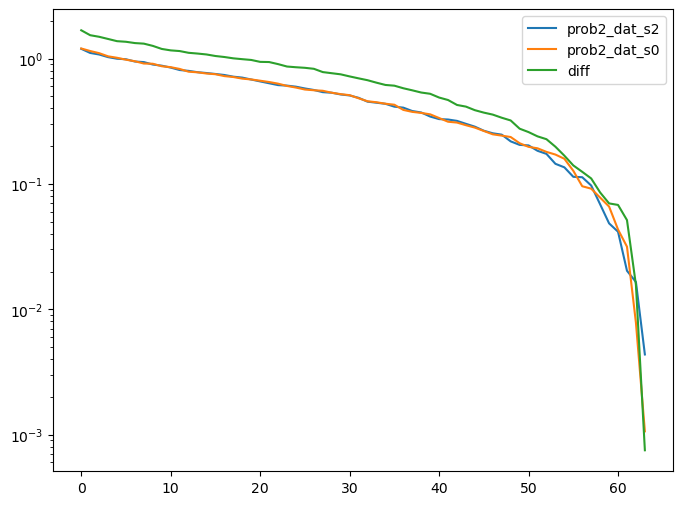

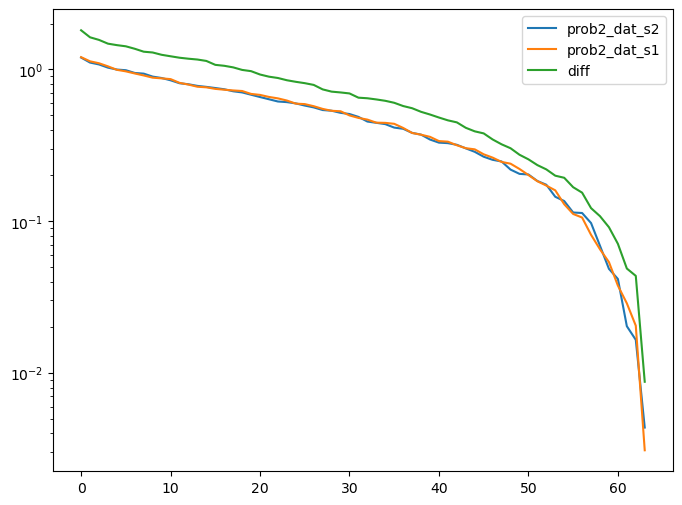

In [39]:
dir_name = 'fig_seed_svd_dat'
layer_name = 'hidden_layers.0.weight'
for i, name1 in enumerate(models.keys()):
    for j, name2 in enumerate(models.keys()):
        if i <= j:
            continue
        m1 = models[name1]
        m2 = models[name2]
        s1,s2,s_diff = output_svd(m1, m2, layer_name)
        plot_svd(s1, s2, s_diff, name1, name2, layer_name, dir_name)


In [21]:
base_name = 'p1D1'
layer_names = ['hidden_layers.0.weight', 'hidden_layers.1.weight']
s = {}
for name in models:
    if name == base_name:
        continue
    s[name] = {}
    for layer_name in layer_names:
        delta = models[name].state_dict()[layer_name] - models[base_name].state_dict()[layer_name]
        _, s[name][layer_name], _ = torch.svd(delta)

In [13]:
W = {}
s = {}
W['p1D1'] = models['p1D1'].state_dict()['hidden_layers.0.weight']
_, s['p1D1'], _ = torch.svd(W['p1D1'])
W['p1D2'] = models['p1D2'].state_dict()['hidden_layers.0.weight']
_, s['p1D2'], _ = torch.svd(W['p1D2'])

_, s['delta'], _ = torch.svd(W['p1D2']-W['p1D1'])


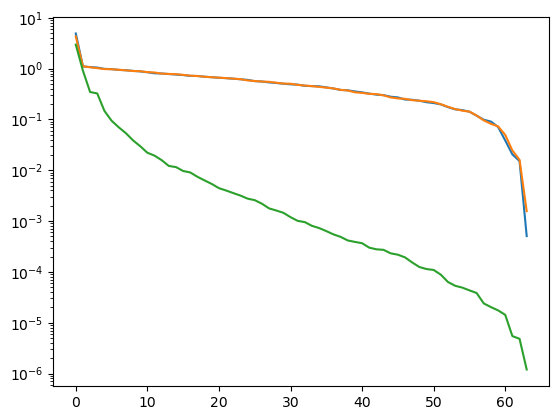

In [14]:
plt.plot(s['p1D1'])
plt.plot(s['p1D2'])
plt.plot(s['delta'])
plt.yscale('log')

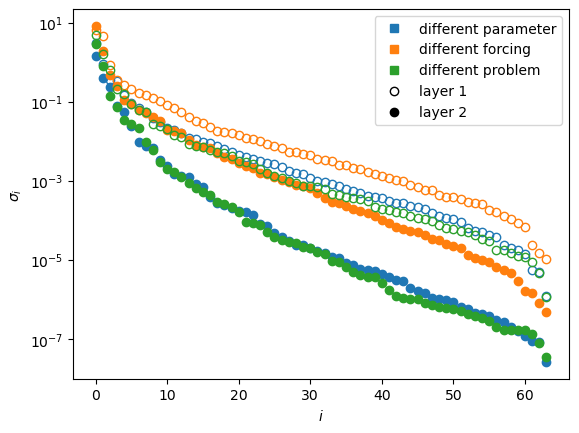

In [25]:
# get default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, name in enumerate(s):
    color = default_colors[i]
    for j, layer_name in enumerate(s[name]):
        fillstyle = 'none' if j == 0 else 'full'        
        plt.plot(s[name][layer_name].cpu().numpy(), 'o', color=color, fillstyle=fillstyle)

# plt.xlim([0, 10])
plt.yscale('log')

plt.plot([],[], 's', color=default_colors[0], label='different parameter')
plt.plot([],[], 's', color=default_colors[1], label='different forcing')
plt.plot([],[], 's', color=default_colors[2], label='different problem')

plt.plot([],[], 'o', color='k', fillstyle='none', label='layer 1')
plt.plot([],[], 'o', color='k', fillstyle='full', label='layer 2')
plt.legend()

plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')

plt.savefig('figs/fig_low_rank.png', bbox_inches='tight')

In [96]:
def get_weights(net):
    weight_dict = {}
    for name, param in net.named_parameters():
        weight_dict[name] = param.clone().detach()
    return weight_dict

# example usage
weight_dict = get_weights(eng.net)